In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
df = pd.read_csv('Titanic-Dataset.csv')

In [72]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [73]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [74]:
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [75]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [76]:
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [77]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [79]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [80]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [81]:
from sklearn.preprocessing import LabelEncoder
label_encoder_Sex = LabelEncoder()
df['Sex'] = label_encoder_Sex.fit_transform(df['Sex'])
label_encoder_Embarked = LabelEncoder()
df['Embarked'] = label_encoder_Embarked.fit_transform(df['Embarked'])

In [90]:
df.drop(columns='Cabin',inplace=True)

In [91]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [92]:
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [85]:
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare Cabin  Embarked
0         3    1  22.0      1      0   7.2500   NaN         2
1         1    0  38.0      1      0  71.2833   C85         0
2         3    0  26.0      0      0   7.9250   NaN         2
3         1    0  35.0      1      0  53.1000  C123         2
4         3    1  35.0      0      0   8.0500   NaN         2
..      ...  ...   ...    ...    ...      ...   ...       ...
886       2    1  27.0      0      0  13.0000   NaN         2
887       1    0  19.0      0      0  30.0000   B42         2
888       3    0  28.0      1      2  23.4500   NaN         2
889       1    1  26.0      0      0  30.0000  C148         0
890       3    1  32.0      0      0   7.7500   NaN         1

[891 rows x 8 columns]


In [93]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [95]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
model = RandomForestClassifier(n_estimators=100, random_state=1)

In [97]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [98]:
y_pred = model.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


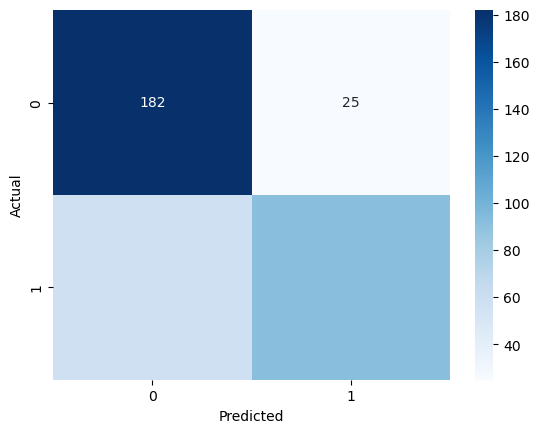

In [100]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       207
           1       0.79      0.61      0.69       150

    accuracy                           0.77       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.77      0.76       357



In [118]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

def predict_survival(passenger):
    passenger_data = pd.DataFrame(columns=X.columns)
    passenger_data.loc[0] = passenger
    passenger_data = scaler.transform(passenger_data)
    prediction = model.predict(passenger_data)[0]
    if prediction == 1:
        
        return "Survived"
    else:
        return "Did not survive"



# Function to handle button click event
def on_predict_click():
    pclass = int(combo_pclass.get())
    sex = int(combo_sex.get())
    age = float(entry_age.get())
    sibsp = int(entry_sibsp.get())
    parch = int(entry_parch.get())
    fare = float(entry_fare.get())
    embarked = int(combo_embarked.get())
    passenger = [pclass, sex, age, sibsp, parch, fare, embarked]
    result = predict_survival(passenger)
    prediction_result.set(f"The passenger is predicted to: {result}")

# Create main application window
root = tk.Tk()
root.title("Titanic Survival Prediction")
prediction_result = tk.StringVar()
# Create labels and entry widgets for user input
lbl_pclass = tk.Label(root, text="Passenger Class (1st, 2nd, 3rd):")
lbl_pclass.grid(row=0, column=0, padx=10, pady=5, sticky="e")
combo_pclass = ttk.Combobox(root, values=[1, 2, 3])
combo_pclass.grid(row=0, column=1, padx=10, pady=5)

lbl_sex = tk.Label(root, text="Sex (0: Female, 1: Male):")
lbl_sex.grid(row=1, column=0, padx=10, pady=5, sticky="e")
combo_sex = ttk.Combobox(root, values=[0, 1])
combo_sex.grid(row=1, column=1, padx=10, pady=5)

lbl_age = tk.Label(root, text="Age:")
lbl_age.grid(row=2, column=0, padx=10, pady=5, sticky="e")
entry_age = tk.Entry(root)
entry_age.grid(row=2, column=1, padx=10, pady=5)

lbl_sibsp = tk.Label(root, text="Number of Siblings/Spouses Aboard:")
lbl_sibsp.grid(row=3, column=0, padx=10, pady=5, sticky="e")
entry_sibsp = tk.Entry(root)
entry_sibsp.grid(row=3, column=1, padx=10, pady=5)

lbl_parch = tk.Label(root, text="Number of Parents/Children Aboard:")
lbl_parch.grid(row=4, column=0, padx=10, pady=5, sticky="e")
entry_parch = tk.Entry(root)
entry_parch.grid(row=4, column=1, padx=10, pady=5)

lbl_fare = tk.Label(root, text="Fare:")
lbl_fare.grid(row=5, column=0, padx=10, pady=5, sticky="e")
entry_fare = tk.Entry(root)
entry_fare.grid(row=5, column=1, padx=10, pady=5)

lbl_embarked = tk.Label(root, text="Port of Embarkation (C, Q, S):")
lbl_embarked.grid(row=6, column=0, padx=10, pady=5, sticky="e")
combo_embarked = ttk.Combobox(root, values=[0, 1, 2])
combo_embarked.grid(row=6, column=1, padx=10, pady=5)

# Create predict button
btn_predict = tk.Button(root, text="Predict Survival", command=on_predict_click)
btn_predict.grid(row=7, column=0, columnspan=2, padx=10, pady=10)
#Create result label
lbl_result = tk.Label(root, textvariable=prediction_result)
lbl_result.grid(row=8, column=0, columnspan=2, padx=10, pady=10)
# Run the application
root.mainloop()

In [116]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
